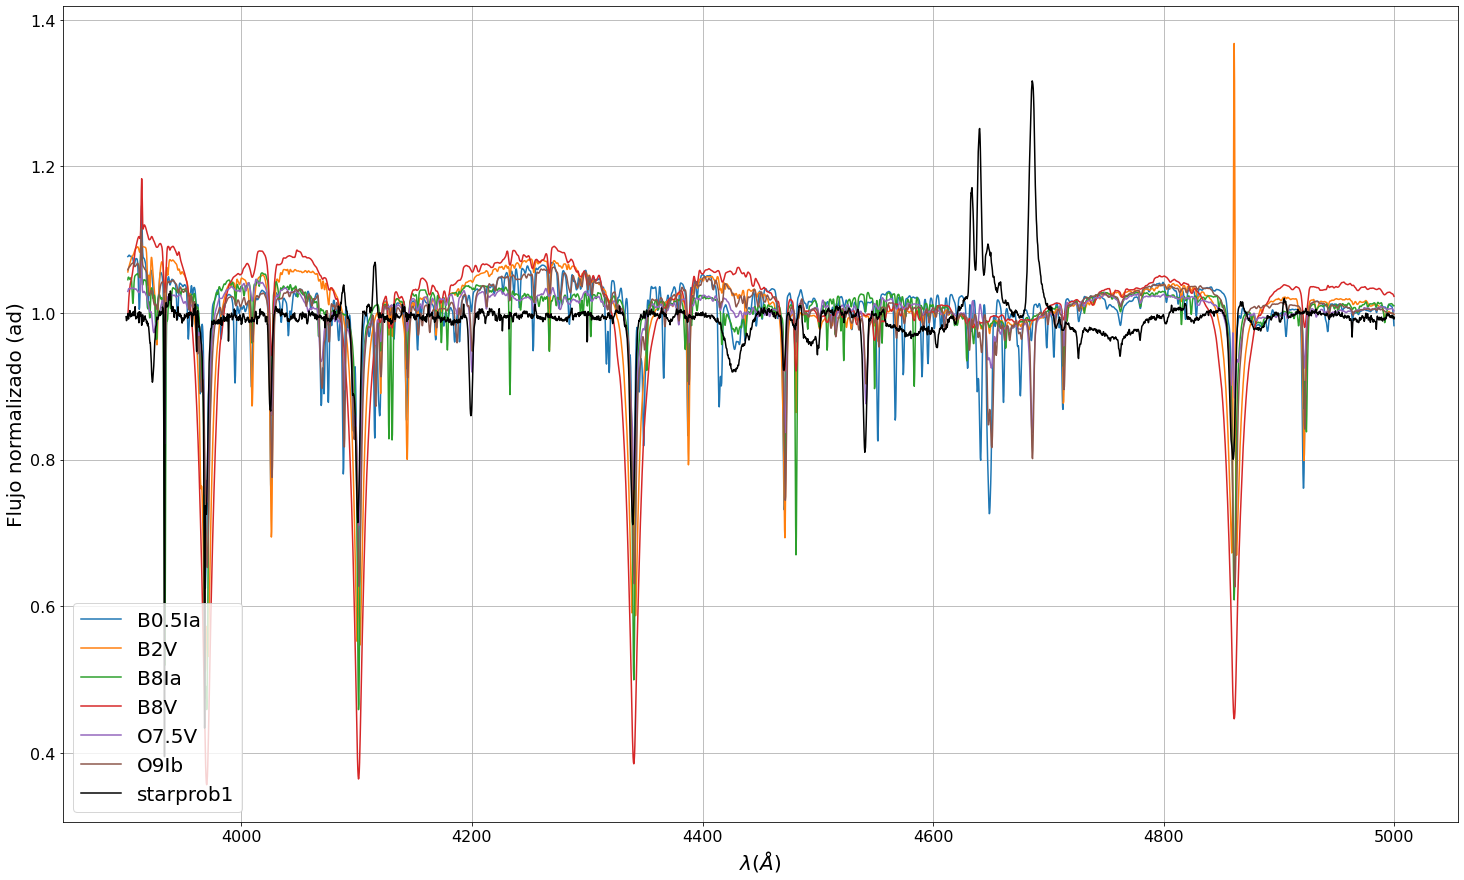

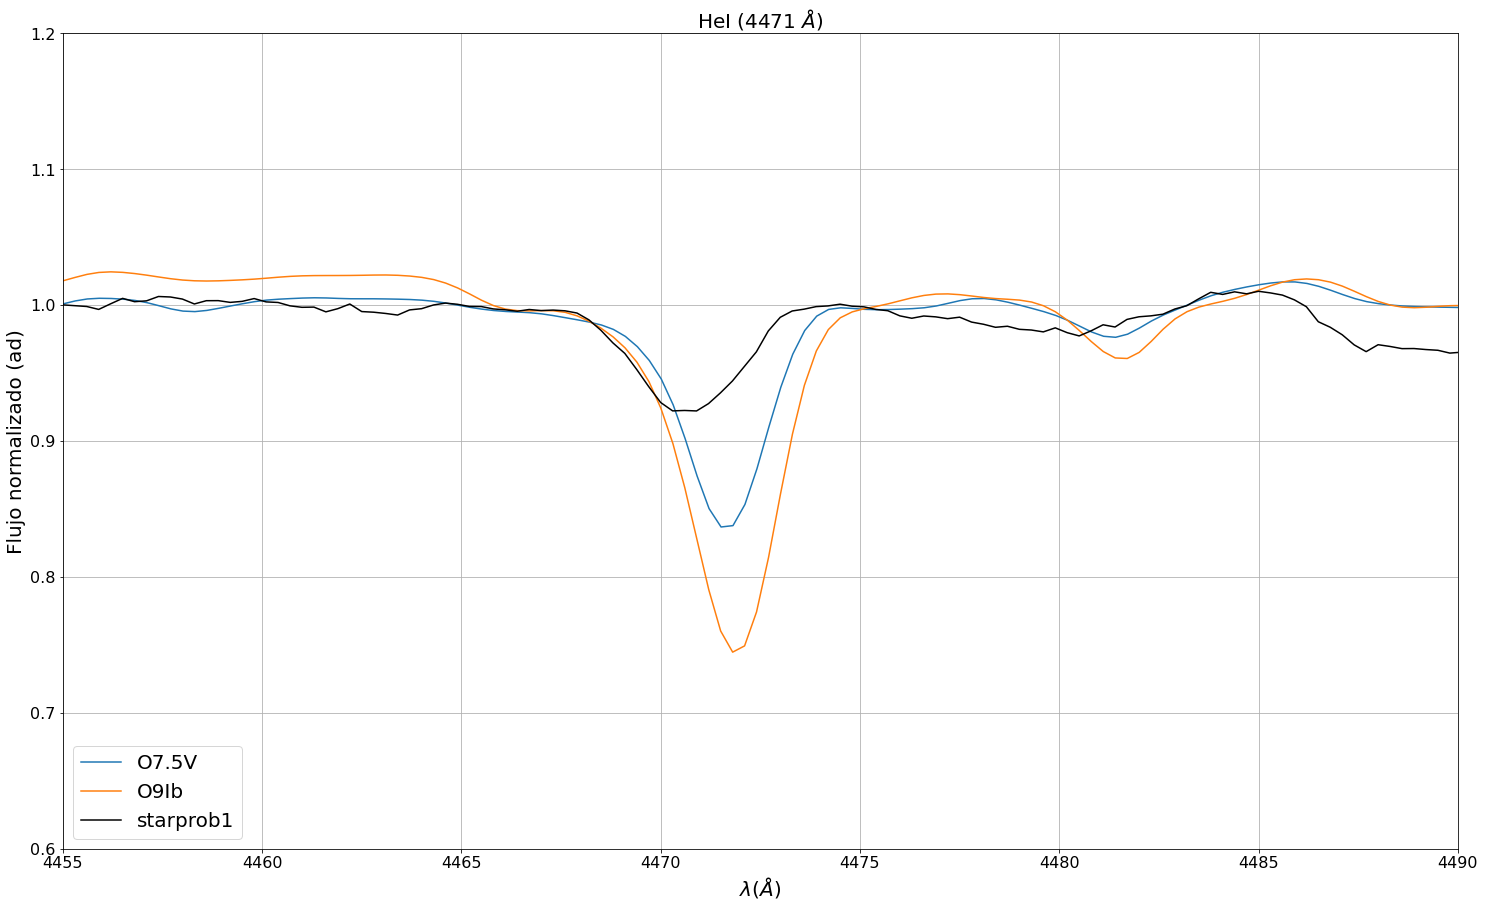

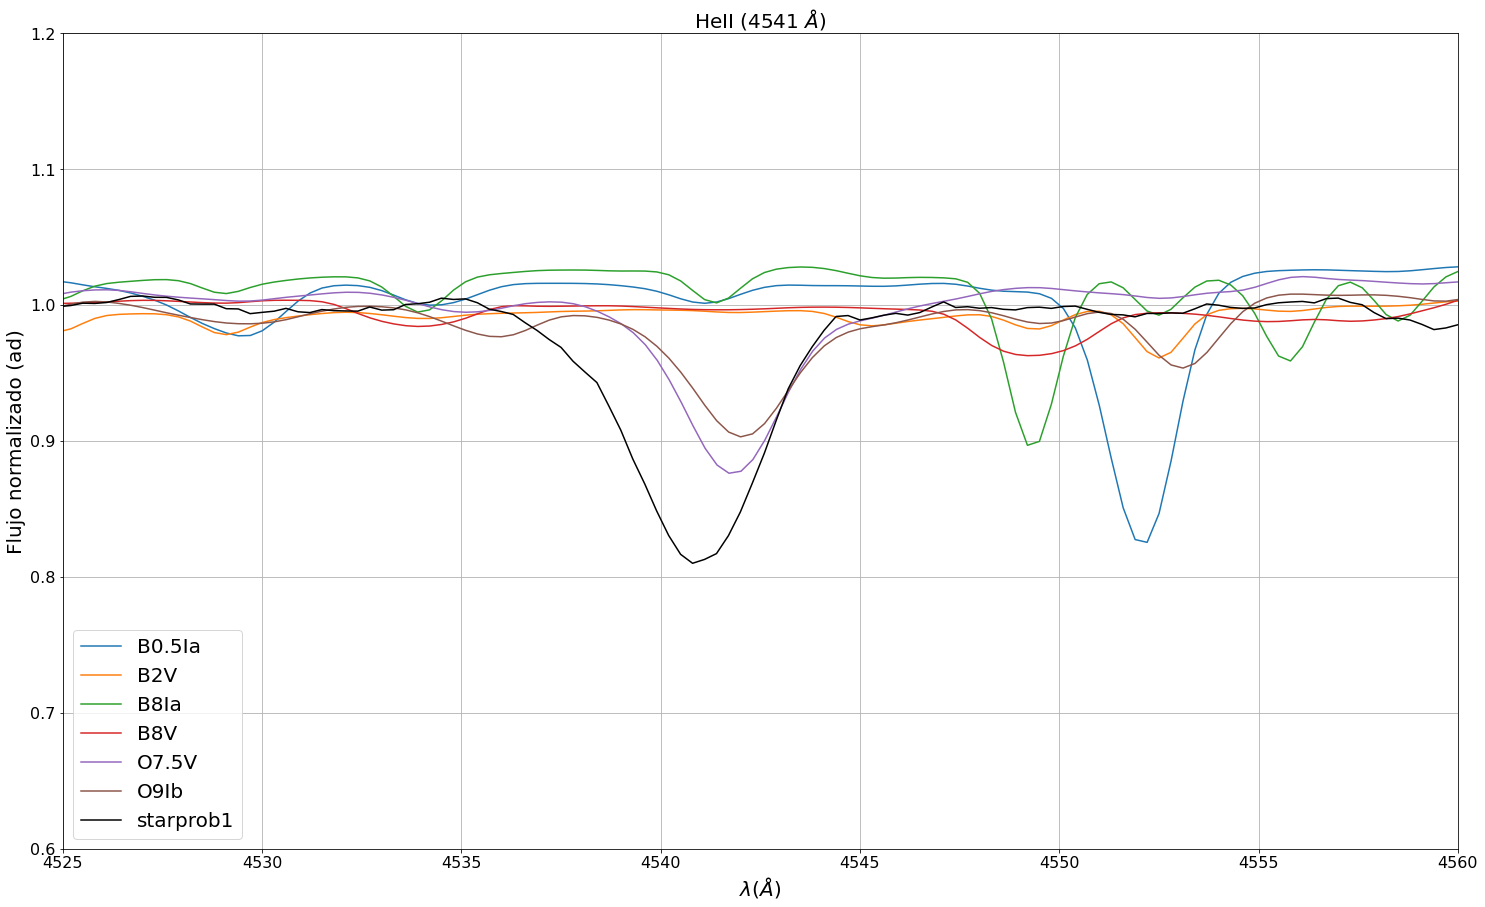

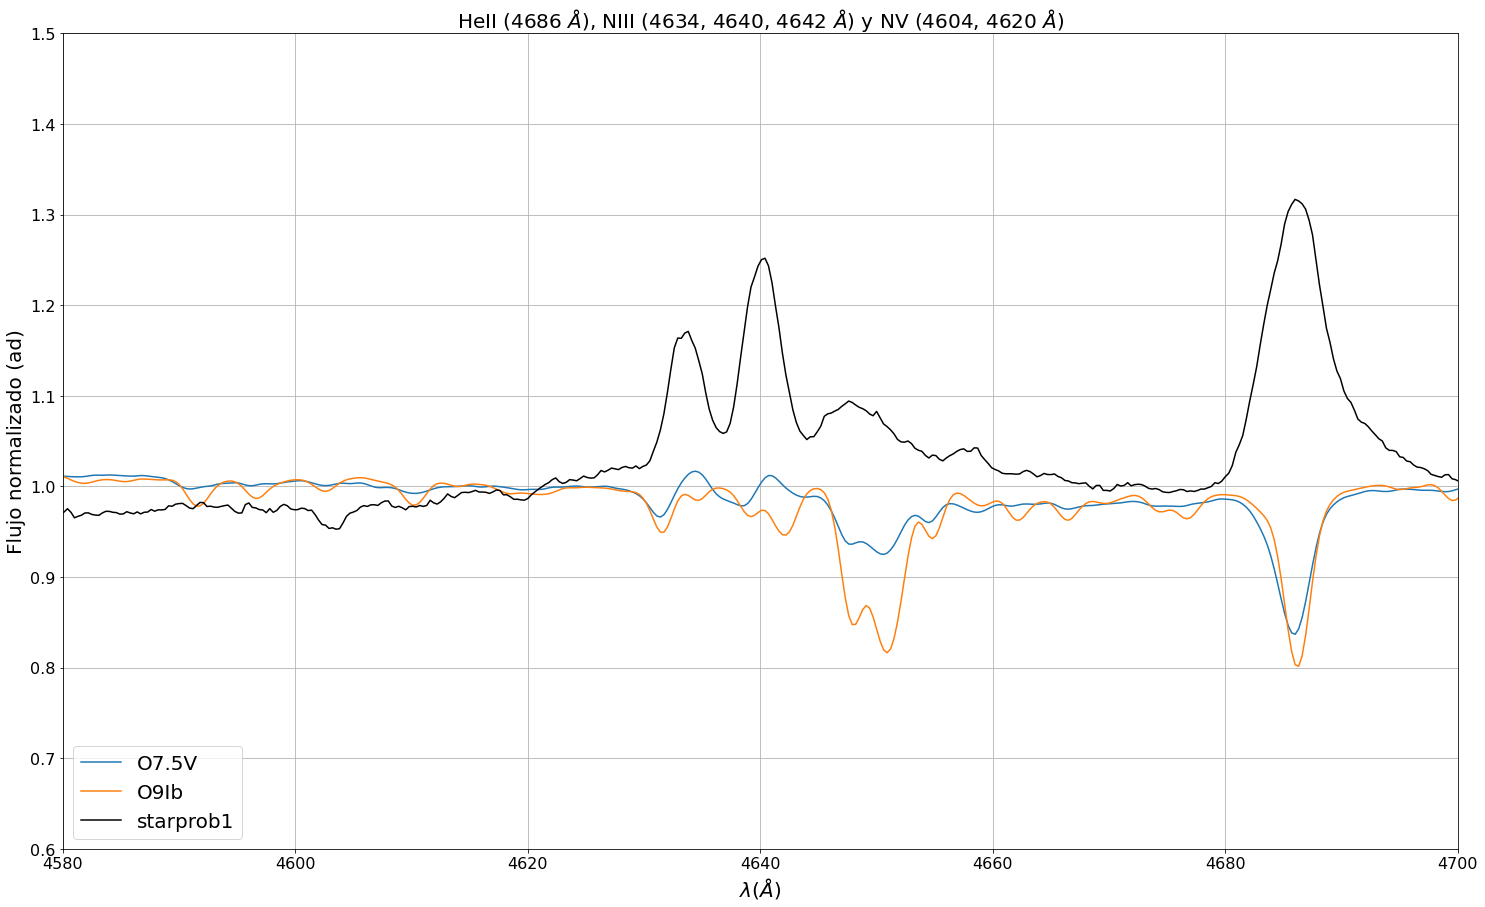

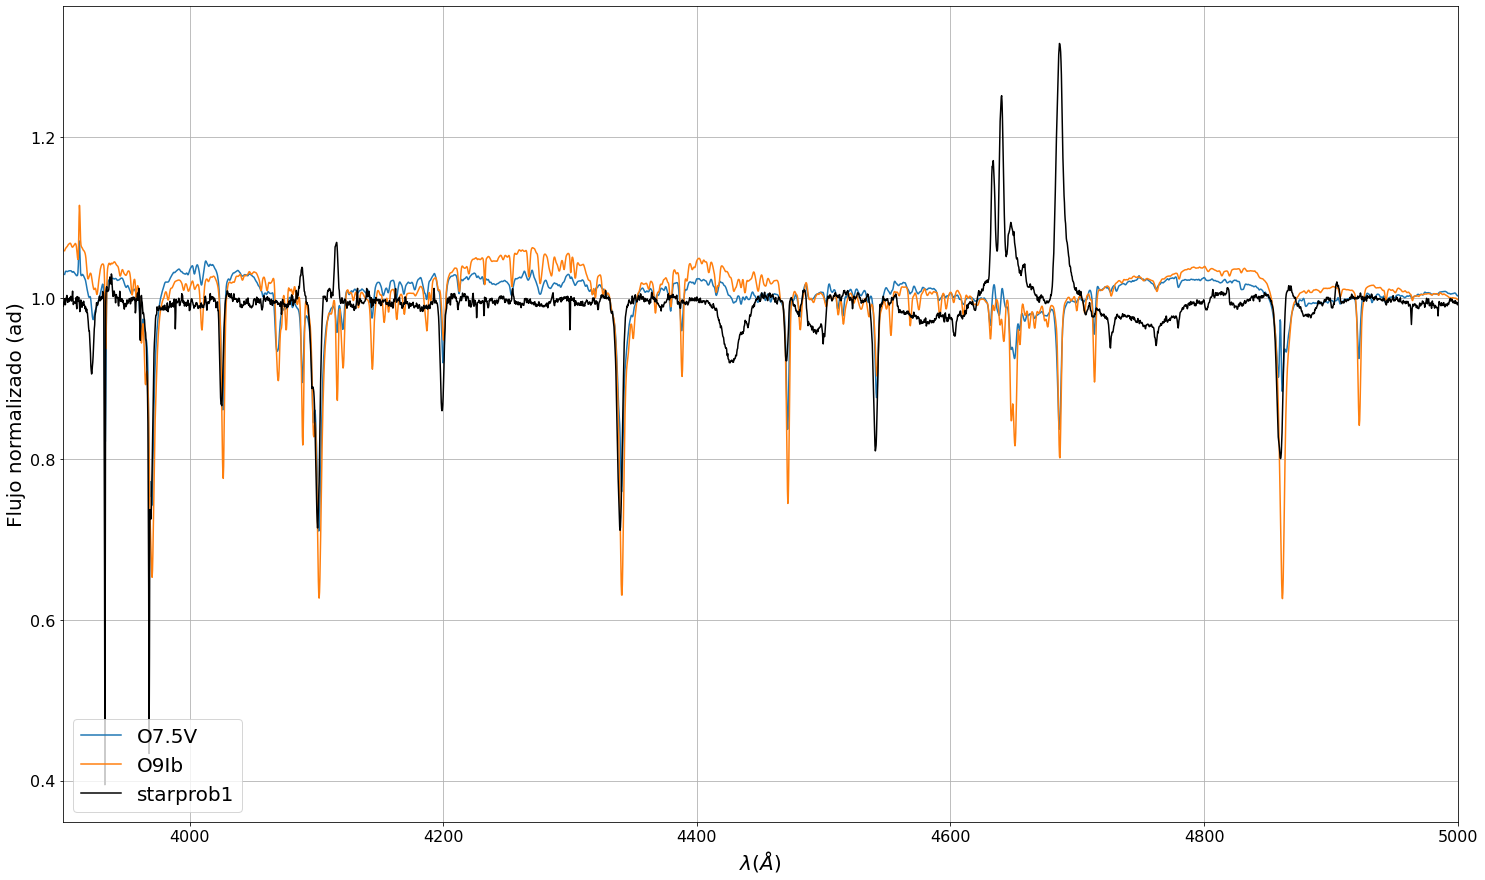

In [61]:
#----------------------------------------------------------------------------------------#
#
# This program graphs, normalizes and convolutes spectra from data given
# in POPUVES (https://www.eso.org/sci/observing/tools/uvespop.html) 
# In this case, the problem spectra have been already normalized, so we
# will just plot them.
#
# Copyright (C) 2021 Andrés García-Serra Romero <alu0101451923@ull.edu.es>
#                    Javier del Socorro Prieto  <alu0101526263@ull.edu.es>
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.





##LIBRARIES & MODULES##
import os
import os.path
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy import units as u
from astropy.visualization import quantity_support
from specutils import Spectrum1D
from specutils.manipulation import (box_smooth, gaussian_smooth, trapezoid_smooth, median_smooth)
from specutils.fitting import fit_generic_continuum
import coronagraph as cg
from astropy.convolution import Gaussian1DKernel
from astropy.convolution import convolve



##PLOT-FORMAT##
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels




        
##STAR NORMALIZED FLUX-WV VECTORS##
# Creating arrays to classify fluxes:
stand_stars = {}
files = os.listdir(".")
for name in files:
    if name[-3:] == "dat":
        if name[:2] == "hd":
            # Importing data:
            data = np.loadtxt(name,skiprows=1,delimiter="  ")
            f = open(name, 'r')
            startype = f.readline()
            startype = startype[:-1]
            lamda = [i[0] for i in data]
            flux = [i[1] for i in data]
              
            # Normalizing:
            flux = np.array(flux)
            lamda = np.array(lamda)
            flux = flux[(lamda < 5000) & (lamda > 3900)]
            lamda = lamda[(lamda < 5000) & (lamda > 3900)]
            flux = flux [5:]
            lamda = lamda [5:]
            y_continuum = 3.2 * np.exp(-0.5 * (lamda - 5.6)**2 / 4.8**2)
            flux += y_continuum
            spectrum = Spectrum1D(flux=flux*u.Jy, spectral_axis=lamda*u.AA)
            g1_fit = fit_generic_continuum(spectrum)
            y_continuum_fitted = g1_fit(lamda*u.AA)
            spec_normalized = spectrum / y_continuum_fitted
            stand_stars[startype] = spec_normalized
            
        if name[:2] == "st":
            # Importing data:
            data = np.loadtxt(name,delimiter="  ")
            f = open(name, 'r')
            lamda = [i[0] for i in data]
            flux = [i[1] for i in data]
            flux = np.array(flux)
            lamda = np.array(lamda)
            flux = flux[(lamda < 5000)&(lamda > 3900)]
            lamda = lamda[(lamda < 5000)&(lamda > 3900)]
            
            # Resolution change set to 3900-5000 Amstrongs with 0.3 step size:
            lammin = 3900
            lammax = 5000
            std = 7.0
            kernel = Gaussian1DKernel(stddev=std)
            theflux = convolve(flux,kernel,normalize_kernel=True, boundary='extend')
            nwl = np.arange(lammin,lammax+0.3,0.3)
            nwf = np.interp(nwl,lamda,theflux)
            
# Ordering stars alphabetically
stand_stars = collections.OrderedDict(sorted(stand_stars.items()))





# All spectra O,B
pathname='spectra/all_spectra.png'
if os.path.isfile(pathname):
    print (pathname + " already exist, delete file to upgrade data.")
else:
    plt.figure(figsize=(25,15))
    for key in stand_stars.keys():
        plt.plot(stand_stars[key].spectral_axis,stand_stars[key].flux,label=key)
    plt.plot(nwl,nwf,"k",label="starprob1")
    plt.grid("yes")
    plt.legend(loc=3)
    plt.ylabel('Flujo normalizado (ad)')
    plt.xlabel(r"$\lambda$"+r"$(\AA)$")
    plt.savefig(pathname)
    
    
    
    
    
# HeI (4471)
    #O,B stars:
pathname='spectra/Hei_OBprob1_spectra.png'
if os.path.isfile(pathname):
    print (pathname + " already exist, delete file to upgrade data.")
else:
    plt.figure(figsize=(25,15))
    for key in stand_stars.keys():
        if key[0]=='O':
            plt.plot(stand_stars[key].spectral_axis,stand_stars[key].flux,label=key)
    plt.plot(nwl,nwf,"k",label="starprob1")
    plt.title("HeI (4471 "+r"$\AA$)")
    plt.grid("yes")
    plt.legend(loc=3)
    plt.xlim([4455,4490])
    plt.ylim([0.6,1.2])
    plt.ylabel('Flujo normalizado (ad)')
    plt.xlabel(r"$\lambda$"+r"$(\AA)$")
    plt.savefig(pathname)

    
    
    
    
# HeII (4541)
    #O,B stars:
pathname='spectra/Heii4541_OBprob1_spectra.png'
if os.path.isfile(pathname):
    print (pathname + " already exist, delete file to upgrade data.")
else:
    plt.figure(figsize=(25,15))
    for key in stand_stars.keys():
        if key[0]=='O' or key[0]=='B':
            plt.plot(stand_stars[key].spectral_axis,stand_stars[key].flux,label=key)
    plt.plot(nwl,nwf,"k",label="starprob1")
    plt.title("HeII (4541 "+r"$\AA$)")
    plt.grid("yes")
    plt.legend(loc=3)
    plt.xlim([4525,4560])
    plt.ylim([0.6,1.2])
    plt.ylabel('Flujo normalizado (ad)')
    plt.xlabel(r"$\lambda$"+r"$(\AA)$")
    plt.savefig(pathname)
    
    
    
    
    
# HeII (4686), NIII (4634-40-42) & NV (4604, 4620)
    #O stars:
pathname='spectra/Heii_Niii_Oprob1_spectra.png'
if os.path.isfile(pathname):
    print (pathname + " already exist, delete file to upgrade data.")
else:
    plt.figure(figsize=(25,15))
    ax = plt.gca()
    #Annotations:
    for key in stand_stars.keys():
        if key[0]=='O':
            plt.plot(stand_stars[key].spectral_axis,stand_stars[key].flux,label=key)
    plt.plot(nwl,nwf,"k",label="starprob1")
    plt.title("HeII (4686 "+r"$\AA$)"+", "+"NIII (4634, 4640, 4642 "+r"$\AA$)"+" y "+"NV (4604, 4620 "+r"$\AA$)")
    plt.grid("yes")
    plt.legend(loc=3)
    plt.xlim([4580,4700])
    plt.ylim([0.6,1.5])
    plt.ylabel('Flujo normalizado (ad)')
    plt.xlabel(r"$\lambda$"+r"$(\AA)$")
    plt.savefig(pathname)
    
# All O stars:
    #O stars:
pathname='spectra/all_Oprob1_spectra.png'
if os.path.isfile(pathname):
    print (pathname + " already exist, delete file to upgrade data.")
else:
    plt.figure(figsize=(25,15))
    for key in stand_stars.keys():
        if key[0]=='O':
            plt.plot(stand_stars[key].spectral_axis,stand_stars[key].flux,label=key)
    plt.plot(nwl,nwf,"k",label="starprob1")
    plt.grid("yes")
    plt.legend(loc=3)
    plt.xlim([3900,5000])
    #plt.ylim([0.6,1.5])
    plt.ylabel('Flujo normalizado (ad)')
    plt.xlabel(r"$\lambda$"+r"$(\AA)$")
    plt.savefig(pathname)